<a href="https://colab.research.google.com/github/arunit737/MACHINE-LEARNING/blob/main/Arunit_text_2_art.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# gpu check
nvidia_output = !nvidia-smi --query-gpu=memory.total --format=noheader,nounits,csv
gpu_memory = int(nvidia_output[0])
if gpu_memory < 14000:
  print(f"--> GPU check: ONLY {gpu_memory} MiB available: WARNING, some things might not work <--")
else:
  print(f"GPU check: {gpu_memory} MiB available: this should be fine")

# install
print("Installing...")
from IPython.utils import io
with io.capture_output() as captured:
  !rm -Rf pixray
  !git clone --recursive https://github.com/pixray/pixray
  !pip install -r pixray/requirements.txt
  !pip install basicsr
  !pip uninstall -y tensorflow 
  !pip install gradio==2.3.7
  !git clone https://github.com/pixray/diffvg
  %cd diffvg
  !git submodule update --init --recursive
  !python setup.py install
  %cd ..
  !pip freeze | grep torch

# remind restart runtime
import os
if not os.path.isfile("first_init_complete"):
  # put stuff in here that should only happen once
  !mkdir -p models
  os.mknod("first_init_complete")
  print("Please choose Runtime -> Restart Runtime from the menu")
  print("(then continue below)")
else:
  print("Setup Complete! Good luck with your drawing")


GPU check: 15109 MiB available: this should be fine
Installing...
Setup Complete! Good luck with your drawing


In [ ]:
import sys
sys.path.append("pixray")
import pixray
import gradio as gr
import torch
import os
cwd=os.getcwd()

# Define the main function
def generate(prompt, quality, style, aspect):
    torch.cuda.empty_cache()
    pixray.reset_settings()
    # pixray.add_settings(drawer="fft")
    # pixray.add_settings(drawer="pixel")
    # pixray.add_settings(drawer="vdiff")
    # prompts = "strange aura in the style of Theodor Severin Kittelsen" #@param {type:"string"}

    # vqgan_model = "wikiart_16384" #@param ["imagenet_f16_16384", "imagenet_f16_1024", "openimages_f16_8192", "wikiart_1024", "wikiart_16384", "coco"]

    # quality = "draft" #@param ["draft", "normal", "better", "best"]

    # aspect = "widescreen" #@param ["widescreen", "square", "portrait"]
        
    pixray.add_settings(drawer=style,prompts=prompt,
                        aspect=aspect,
                        quality=quality,
                        iterations=100,
                        outdir=cwd,
                        )
  
    settings = pixray.apply_settings()
    pixray.do_init(settings)
    pixray.do_run(settings)
    
    return 'output.png'

# Create the UI
prompt = gr.inputs.Textbox(default="Underwater city", label="Text Prompt")
quality = gr.inputs.Radio(choices=['draft', 'normal', 'better','best'], label="Quality")
style = gr.inputs.Radio(choices=['pixel', 'fft','vqgan','clipdraw','line_sketch'], label="Type of drawer")
aspect = gr.inputs.Radio(choices=['square', 'widescreen','portrait'], label="Size")

# Launch the demo
iface = gr.Interface(generate, inputs=[prompt, quality, style, aspect], outputs=['image'],
                     theme='darkhuggingface',
                     css ="""
                     body {background-color : orange}
                     """,
                     
                     enable_queue=True, live=False)
iface.launch(debug=True)

In [2]:
!pip install fastapi nest-asyncio pyngrok uvicorn aiofiles python-multipart firebase-admin
!pip install sendgrid

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
import sys
sys.path.append("pixray")
import pixray
import gradio as gr
import torch
import os
import torch
from fastapi import FastAPI, Request
from fastapi.middleware.cors import CORSMiddleware
from fastapi import FastAPI, File, UploadFile, Form, BackgroundTasks
from fastapi.responses import FileResponse

from fastapi.responses import HTMLResponse
from fastapi.templating import Jinja2Templates

app = FastAPI()


In [2]:
# import sys
# sys.path.append("pixray")
# import pixray
# import gradio as gr
# import torch
# import os
# import torch
# from fastapi import FastAPI
# from fastapi.middleware.cors import CORSMiddleware
# from fastapi import FastAPI, File, UploadFile, Form, BackgroundTasks
# from fastapi.responses import FileResponse

# app = FastAPI()

# @app.get("/", response_class=HTMLResponse)
# async def home(request: Request):
#     data = {
#         "page": "Home page"
#     }
#     return templates.TemplateResponse("page.html", {"request": request, "data": data})


# @app.get("/page/{page_name}", response_class=HTMLResponse)
# async def page(request: Request, page_name: str):
#     data = {
#         "page": page_name
#     }
#     return templates.TemplateResponse("page.html", {"request": request, "data": data})

app.add_middleware(
    CORSMiddleware,
    allow_origins=['*'],
    allow_credentials=True,
    allow_methods=['*'],
    allow_headers=['*'],
)

@app.get('/')
async def root():
    return {'hello': 'world'}

@app.post("/generate")
async def generate(
        seed: int = Form(None),
        iterations: int = Form(None),
        prompts: str = Form("Underwater City"),
        quality: str = Form("draft"),
        aspect: str = Form("square"),
        scale: float = Form(2.5),
        style: str = Form('image'),
        make_video: bool = Form(False),      
    ):
    torch.cuda.empty_cache()
    pixray.reset_settings()
    cwd=os.getcwd()
    pixray.add_settings(drawer=style,prompts=prompts,
                        aspect=aspect,
                        quality=quality,
                        iterations=100,
                        outdir=cwd,
                        )
  
    settings = pixray.apply_settings()
    pixray.do_init(settings)
    pixray.do_run(settings)
    
    
   
    
   

    return FileResponse('output.png', media_type="image/png")

    
    # pixray.add_settings(drawer="fft")
    # pixray.add_settings(drawer="pixel")
    # pixray.add_settings(drawer="vdiff")
    # prompts = "strange aura in the style of Theodor Severin Kittelsen" #@param {type:"string"}

    # vqgan_model = "wikiart_16384" #@param ["imagenet_f16_16384", "imagenet_f16_1024", "openimages_f16_8192", "wikiart_1024", "wikiart_16384", "coco"]

    # quality = "draft" #@param ["draft", "normal", "better", "best"]

    # aspect = "widescreen" #@param ["widescreen", "square", "portrait"]
        
    

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml
Public URL: http://be8a-34-86-132-165.ngrok.io
Doc URL: http://be8a-34-86-132-165.ngrok.io/docs


INFO:     Started server process [1813]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)


INFO:     2402:e280:3d13:22c:147d:6d35:9a5:290b:0 - "GET /docs HTTP/1.1" 200 OK
INFO:     2402:e280:3d13:22c:147d:6d35:9a5:290b:0 - "GET /openapi.json HTTP/1.1" 200 OK


  3%|▉                                     | 8.55M/335M [00:00<00:03, 89.6MiB/s]

Using seed: 15333149784466449329
Running pixeldrawer with 40x40 grid


100%|████████████████████████████████████████| 335M/335M [00:01<00:00, 183MiB/s]


Loaded CLIP ViT-B/16: 224x224 and 149.62M params
Using device: cuda:0
Optimising using: Adam
Using text prompts: ['Underwater City']


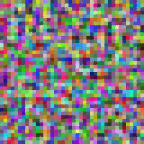

iter: 0, loss: 0.982, losses: 0.917, 0.0651 (-0=>0.9824)
iter: 10, loss: 0.89, losses: 0.83, 0.0604 (-0=>0.8899)


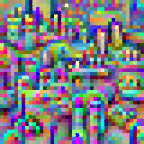

iter: 20, loss: 0.856, losses: 0.796, 0.0606 (-1=>0.8505)
iter: 30, loss: 0.825, losses: 0.764, 0.0608 (-0=>0.8252)


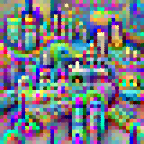

iter: 40, loss: 0.807, losses: 0.745, 0.0617 (-0=>0.807)
iter: 50, loss: 0.797, losses: 0.736, 0.0613 (-1=>0.7958)


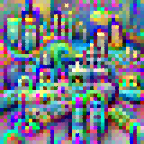

iter: 60, loss: 0.798, losses: 0.735, 0.0624 (-7=>0.7844)
iter: 70, loss: 0.771, losses: 0.707, 0.0639 (-0=>0.7711)
Dropping learning rate


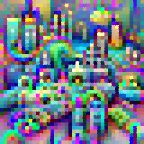

iter: 80, loss: 0.766, losses: 0.702, 0.064 (-0=>0.7659)
iter: 90, loss: 0.765, losses: 0.701, 0.0648 (-3=>0.7652)


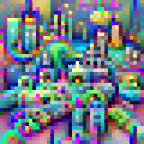

iter: 100, finished (-2=>0.7611)




INFO:     2402:e280:3d13:22c:147d:6d35:9a5:290b:0 - "POST /generate HTTP/1.1" 200 OK
INFO:     2402:e280:3d13:22c:147d:6d35:9a5:290b:0 - "GET / HTTP/1.1" 200 OK
INFO:     2402:e280:3d13:22c:147d:6d35:9a5:290b:0 - "GET /docs HTTP/1.1" 200 OK
INFO:     2402:e280:3d13:22c:147d:6d35:9a5:290b:0 - "GET /openapi.json HTTP/1.1" 200 OK
Using seed: 8452522909792243476
Working with z of shape (1, 256, 16, 16) = 65536 dimensions.


Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to models/checkpoints/vgg16-397923af.pth


8.19kB [00:00, 84.1kB/s]                   


loaded pretrained LPIPS loss from taming/modules/autoencoder/lpips/vgg.pth
VQLPIPSWithDiscriminator running with hinge loss.


  0%|                                               | 0.00/338M [00:00<?, ?iB/s]

Restored from models/vqgan_imagenet_f16_16384.ckpt


100%|███████████████████████████████████████| 338M/338M [00:10<00:00, 33.5MiB/s]


Loaded CLIP ViT-B/32: 224x224 and 151.28M params
Loaded CLIP ViT-B/16: 224x224 and 149.62M params
Using device: cuda:0
Optimising using: Adam
Using text prompts: ['Underwater City']


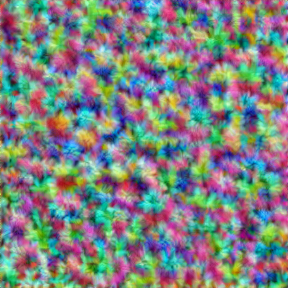

iter: 0, loss: 2, losses: 0.945, 0.0609, 0.925, 0.0648 (-0=>1.996)
iter: 10, loss: 1.69, losses: 0.78, 0.0589, 0.792, 0.0588 (-0=>1.69)


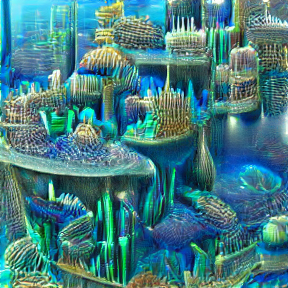

iter: 20, loss: 1.61, losses: 0.734, 0.0612, 0.754, 0.0598 (-0=>1.61)
iter: 30, loss: 1.58, losses: 0.722, 0.0614, 0.737, 0.06 (-0=>1.58)


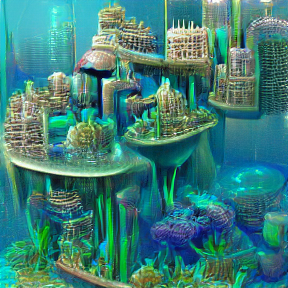

iter: 40, loss: 1.56, losses: 0.712, 0.0631, 0.721, 0.0618 (-2=>1.554)
iter: 50, loss: 1.54, losses: 0.708, 0.0628, 0.711, 0.0619 (-0=>1.543)


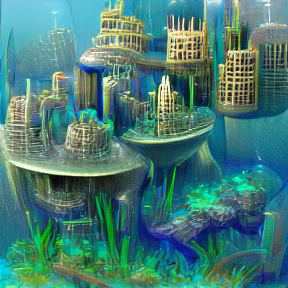

iter: 60, loss: 1.53, losses: 0.694, 0.0644, 0.706, 0.0614 (-2=>1.525)
iter: 70, loss: 1.52, losses: 0.696, 0.0628, 0.7, 0.0612 (-0=>1.519)
Dropping learning rate


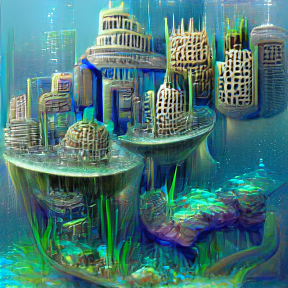

iter: 80, loss: 1.51, losses: 0.692, 0.0632, 0.698, 0.0616 (-5=>1.512)
iter: 90, loss: 1.51, losses: 0.686, 0.0643, 0.697, 0.0615 (-8=>1.5)


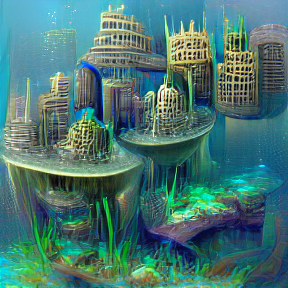

iter: 100, finished (-3=>1.495)




INFO:     2402:e280:3d13:22c:147d:6d35:9a5:290b:0 - "POST /generate HTTP/1.1" 200 OK


In [ ]:
import nest_asyncio
from pyngrok import ngrok
import uvicorn
!ngrok authtoken 2HIQkoRv4FmXBg7fqhkUGqA1Zn9_7619m4V1rmMgtSrxxFhbh
ngrok_tunnel = ngrok.connect(8000)
print('Public URL:', ngrok_tunnel.public_url)
print('Doc URL:', ngrok_tunnel.public_url+'/docs')
nest_asyncio.apply()
uvicorn.run(app, port=8000)

In [ ]:
!git clone https://github.com/mfrashad/text2art.git

Cloning into 'text2art'...
remote: Enumerating objects: 97, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 97 (delta 4), reused 3 (delta 3), pack-reused 90
Unpacking objects: 100% (97/97), done.
